In [79]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
import numpy as np 
import matplotlib.pyplot as plt 
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
print (tf.__version__)

2.10.0


In [80]:

(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [81]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


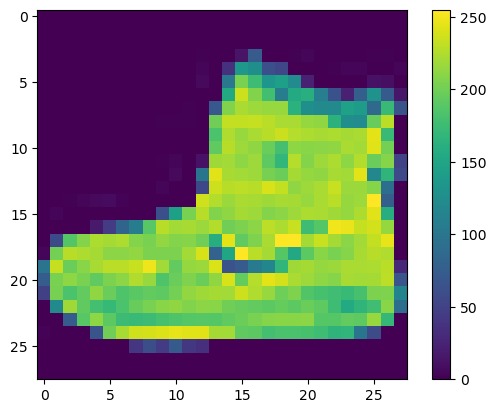

In [82]:
plt.Figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [83]:
x_train=x_train/255.0
x_test=x_test/255.0

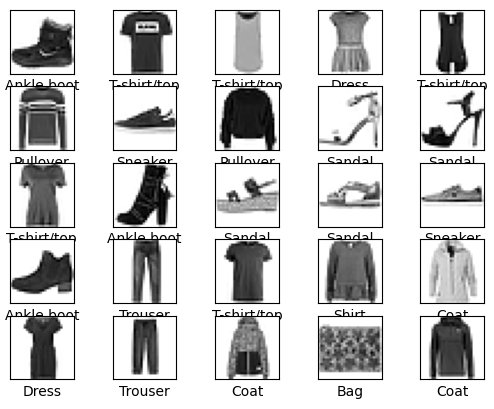

In [84]:
plt.Figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(x_train[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[y_train[i]])

In [85]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [87]:
# es=keras.callbacks.EarlyStopping( monitor='val_loss',patience=10)
history_model=model.fit(
    x_train,y_train,
    epochs=50,
    validation_split=0.2,
    # callbacks=es
)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5020 - accuracy: 0.8194 - val_loss: 0.3959 - val_accuracy: 0.8585
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3723 - accuracy: 0.8634 - val_loss: 0.3704 - val_accuracy: 0.8692
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3337 - accuracy: 0.8777 - val_loss: 0.3719 - val_accuracy: 0.8658
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3118 - accuracy: 0.8846 - val_loss: 0.3332 - val_accuracy: 0.8782
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8895 - val_loss: 0.3740 - val_accuracy: 0.8638
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2817 - accuracy: 0.8941 - val_loss: 0.3223 - val_accuracy: 0.8856
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2661 - accuracy: 0.9012 - val_loss: 0.3300 - val_accuracy:

313/313 - 1s - loss: 0.6358 - accuracy: 0.8842 - 921ms/epoch - 3ms/step
loss: 3 layers 0.6358065009117126
accuracy 3 layers: 0.8841999769210815


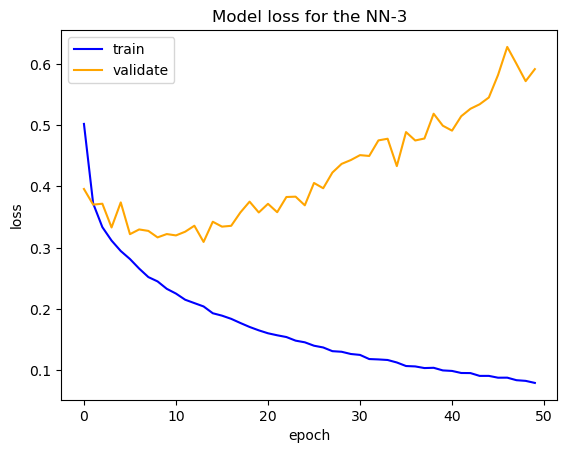

In [88]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=2)
print('loss: 3 layers',loss)
print('accuracy 3 layers:',accuracy)
plt.plot(history_model.history['loss'], 'blue')
plt.plot(history_model.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

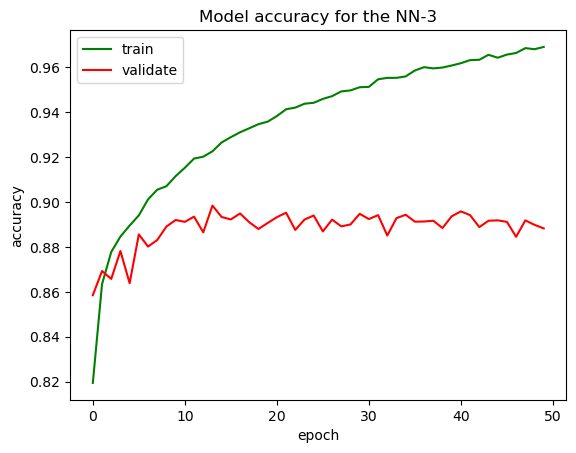

In [89]:
#Plot accuracy results for training data and testing data 
plt.plot(history_model.history['accuracy'], 'green')
plt.plot(history_model.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [90]:
predict=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [91]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               100480    
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dense_42 (Dense)            (None, 128)               16512     
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 10)               

In [92]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [93]:
history_model2=model2.fit(
    x_train,y_train,
    epochs=50,
    validation_split=0.2,
    # callbacks=es
)

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5302 - accuracy: 0.8060 - val_loss: 0.4107 - val_accuracy: 0.8568
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3896 - accuracy: 0.8564 - val_loss: 0.3867 - val_accuracy: 0.8550
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3525 - accuracy: 0.8701 - val_loss: 0.3557 - val_accuracy: 0.8763
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3276 - accuracy: 0.8801 - val_loss: 0.3575 - val_accuracy: 0.8703
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3110 - accuracy: 0.8855 - val_loss: 0.3636 - val_accuracy: 0.8639
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2954 - accuracy: 0.8913 - val_loss: 0.3573 - val_accuracy: 0.8761
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2832 - accuracy: 0.8952 - val_loss: 0.3256 - val_accuracy

313/313 - 1s - loss: 0.6008 - accuracy: 0.8927 - 1s/epoch - 5ms/step
loss: 6 layers 0.6007971167564392
accuracy 6 layers: 0.8927000164985657


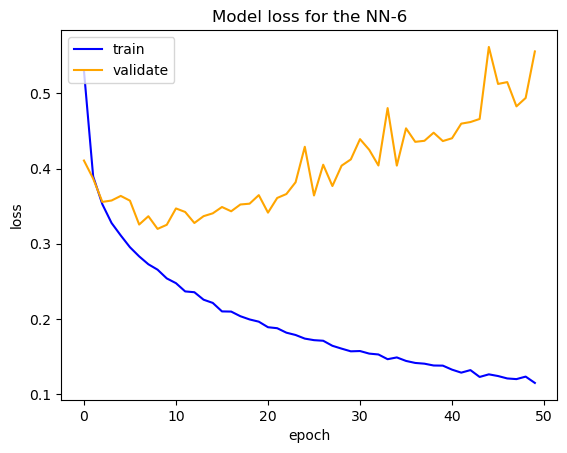

In [94]:
loss,accuracy=model2.evaluate(x_test,y_test,verbose=2)
print('loss: 6 layers',loss)
print('accuracy 6 layers:',accuracy)
plt.plot(history_model2.history['loss'], 'blue')
plt.plot(history_model2.history['val_loss'], 'orange')
plt.title('Model loss for the NN-6')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

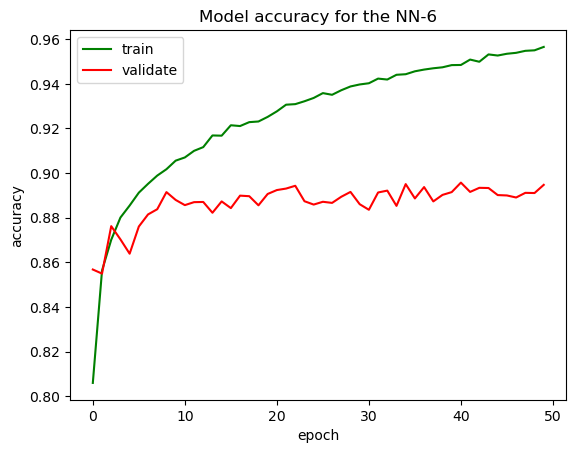

In [95]:
#Plot accuracy results for training data and testing data 
plt.plot(history_model2.history['accuracy'], 'green')
plt.plot(history_model2.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-6')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')